## KNN Mini Project

In this notebook I'm going to implement my fresh knowledge in regards of KNN

**Importing** **the** **required** **libraries** **and** **methods**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

A useful function I'll use later on.

In [13]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

**here I'll be using the tumor data sets that contains lab test results about tumor samples. The objective is to classify whether a tumor is malicious (cancer) or benign.**

In [3]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

**EDA**

In [4]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
tumor_df.info()

tumor_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


,count,mean,std,min,25%,50%,75%,max
Clump,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
UnifSize,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
UnifShape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
MargAdh,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
SingEpiSize,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
BareNuc,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
BlandChrom,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
NormNucl,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mit,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,0.349927,0.477296,0.0,0.0,0.0,1.0,1.0


Let's split the features from the outcome variable and set them to X and the outcome variable to y.

In [7]:
X = tumor_df.iloc[:, :-1]
y = tumor_df.iloc[:, -1:]

Class distribution of Y.

In [11]:
y.value_counts(normalize=True)

,proportion
Class,
0,0.650073
1,0.349927


We can see that class 0 has 65% while class 1 has 34.9%

**Now let's split the data into training and testing splits.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=120)

**Now let's train our KNN and see the results.**

In [14]:
knn  = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train.values.ravel())

knn_pred = knn.predict(X_test)

In [15]:
evaluate_metrics(y_test, knn_pred)

{'accuracy': 0.9781021897810219,
 'recall': 1.0,
 'precision': 0.9411764705882353,
 'f1score': 0.9696969696969697}

Wow I was not excepting the results to be that good from the first try 😅
The Recall tells us that the model caught every positive casen o false negatives.

**With these results I can just stop here but let's try one last thing and it's to find optimal value for k.**

In [18]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store F1 score for each k
f1_scores = []

In [19]:
for k in range(1, max_k + 1):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with F1 score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9388
2,0.9149
3,0.9697
4,0.9375
5,0.9495
6,0.9388
7,0.9388
8,0.9263
9,0.9167


Text(0.5, 1.0, 'KNN F1 Score')

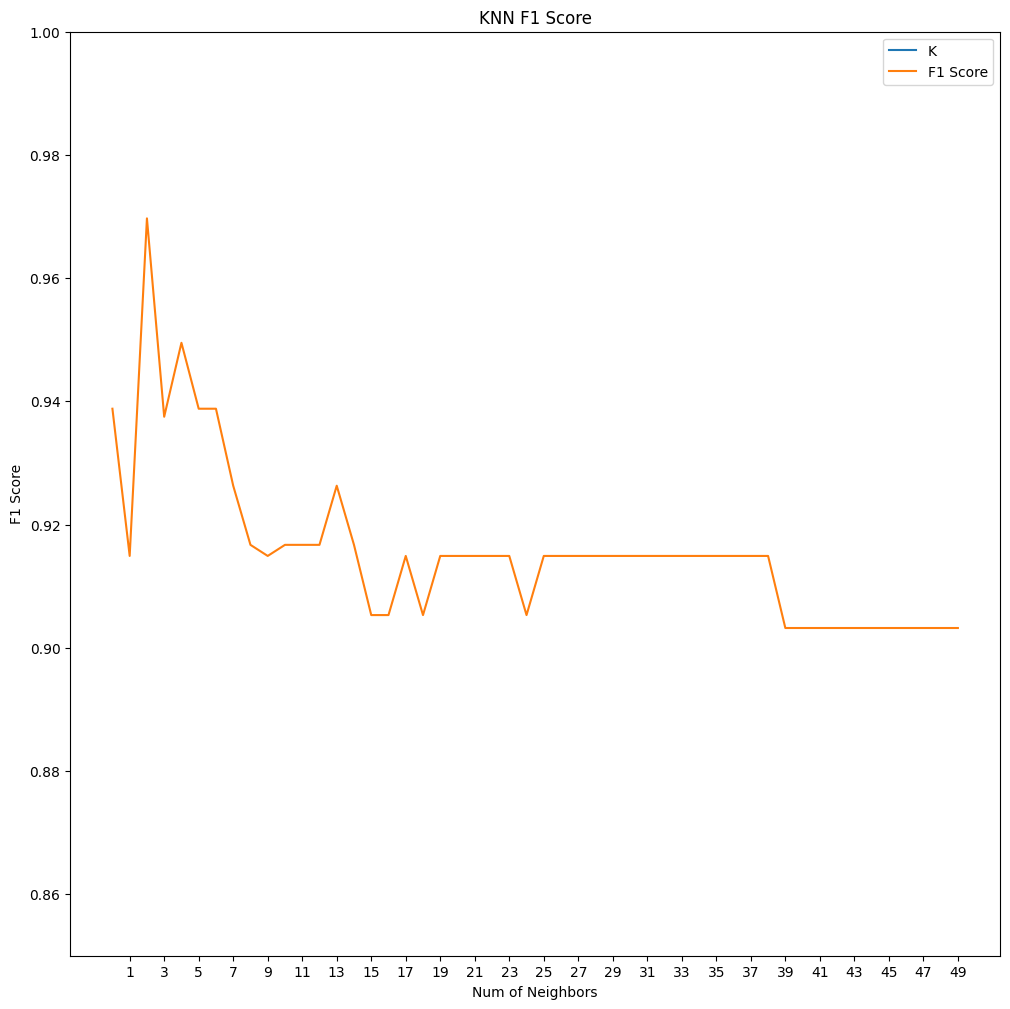

In [20]:
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

**That's explain why the eesults were so good from the first attempt, because the best value for K that gives us the highest F1 score is roughly 3.**
